# Temperature model

### Data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\user\\Downloads\\koi.predictions1.csv.')

In [3]:
df

,kepoi_name,koi_disposition,koi_steff,koi_depth,koi_slogg
0,K00752.01,1,5455.0,615.8,4.467
1,K00752.02,1,5455.0,874.8,4.467
2,K00753.01,0,5853.0,10829.0,4.544
3,K00755.01,1,6031.0,603.3,4.438
4,K00756.01,1,6046.0,1517.5,4.486
...,...,...,...,...,...
4719,K07978.01,0,6297.0,46.7,3.890
4720,K07982.01,0,6231.0,1140.0,4.488
4721,K08193.01,0,5570.0,1301.0,4.561
4722,K07986.01,0,6119.0,48.5,4.444


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kepoi_name       4724 non-null   object 
 1   koi_disposition  4724 non-null   int64  
 2   koi_steff        4618 non-null   float64
 3   koi_depth        4618 non-null   float64
 4   koi_slogg        4618 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 184.7+ KB


In [5]:
df.isnull().values.any()

True

In [6]:
df = df.dropna()

In [7]:
df.isnull().values.any()

False

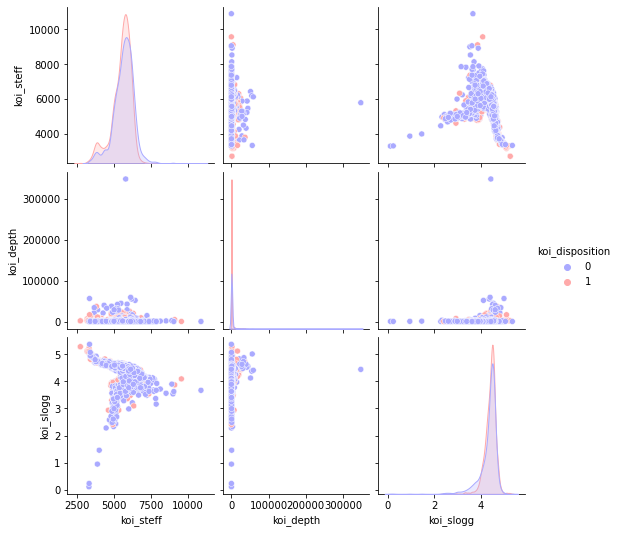

In [8]:
sns.pairplot(df,hue='koi_disposition', palette= 'bwr')

koi_slogg/koi_steff model

### Test split 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df = df.drop('kepoi_name', axis=1)

In [11]:
X = df.drop('koi_disposition', axis=1)
y = df['koi_disposition']

In [12]:
y

0       1
1       1
2       0
3       1
4       1
       ..
4719    0
4720    0
4721    0
4722    0
4723    0
Name: koi_disposition, Length: 4618, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Test model SVC():

In [14]:
#from sklearn.linear_model import SGDRegressor SVM and lenear , logistic models work only with non continuous target
#Classification metrics can't handle a mix of multiclass and continuous targets

In [15]:
from sklearn.svm import SVC

In [16]:
svc_model =SVC(kernel='poly', coef0=0.0,)

In [17]:
svc_model.fit(X_train, y_train)

SVC(kernel='poly')

## Predictions SVC

In [18]:
predictions = svc_model.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
print(confusion_matrix(y_test, predictions))
print('')
print(classification_report(y_test, predictions))

[[268 180]
 [243 233]]

              precision    recall  f1-score   support

           0       0.52      0.60      0.56       448
           1       0.56      0.49      0.52       476

    accuracy                           0.54       924
   macro avg       0.54      0.54      0.54       924
weighted avg       0.54      0.54      0.54       924



In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

0.4577922077922078

## Test GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {'C': [0.1, 1, 10, 10], 'gamma':[1, 0.1, 0.01, 0.001]}

In [24]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   2.8s
[CV] END .....................................C=0.1, gamma=1; total time=   2.5s
[CV] END .....................................C=0.1, gamma=1; total time=   2.9s
[CV] END .....................................C=0.1, gamma=1; total time=   2.5s
[CV] END .....................................C=0.1, gamma=1; total time=   2.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.4s
[CV] END ..................................C=0.1, gamma=0.01; total time=   2.1s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 10], 'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
grid_predict = grid.predict(X_test)

In [26]:
print (classification_report(y_test, grid_predict))

              precision    recall  f1-score   support

           0       0.60      0.50      0.54       448
           1       0.59      0.68      0.63       476

    accuracy                           0.59       924
   macro avg       0.59      0.59      0.59       924
weighted avg       0.59      0.59      0.59       924



In [29]:
mean_squared_error(y_test, grid_predict)

0.408008658008658

## Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_train

array([[4.36332560e-01, 8.87599460e-04, 7.98476190e-01],
       [3.77487486e-01, 1.75382759e-02, 8.36952381e-01],
       [2.27200586e-01, 2.57030420e-03, 8.53142857e-01],
       ...,
       [3.74191185e-01, 2.96440985e-04, 8.08380952e-01],
       [8.37748749e-01, 2.73461063e-04, 7.56952381e-01],
       [3.07044317e-01, 3.87498923e-04, 8.44571429e-01]])

In [34]:
X_test = scaler.fit_transform(X_test)

## Create Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adadelta

In [36]:
model = Sequential()

model.add(Dense(4,activation='sigmoid'))
model.add(Dense(2,activation='sigmoid'))


model.add(Dense(1))

model.compile(optimizer='adadelta',loss='mse')

In [37]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=131,epochs=600)

Epoch 1/600
29/29 [==============================] - 2s 16ms/step - loss: 0.2606 - val_loss: 0.2627
Epoch 2/600
29/29 [==============================] - 0s 5ms/step - loss: 0.2605 - val_loss: 0.2626
Epoch 3/600
29/29 [==============================] - 0s 5ms/step - loss: 0.2605 - val_loss: 0.2626
Epoch 4/600
29/29 [==============================] - 0s 6ms/step - loss: 0.2605 - val_loss: 0.2626
Epoch 5/600
29/29 [==============================] - 0s 5ms/step - loss: 0.2605 - val_loss: 0.2626
Epoch 6/600
29/29 [==============================] - 0s 8ms/step - loss: 0.2604 - val_loss: 0.2625
Epoch 7/600
29/29 [==============================] - 0s 6ms/step - loss: 0.2604 - val_loss: 0.2625
Epoch 8/600
29/29 [==============================] - 0s 6ms/step - loss: 0.2604 - val_loss: 0.2625
Epoch 9/600
29/29 [==============================] - 0s 6ms/step - loss: 0.2604 - val_loss: 0.2624
Epoch 10/600
29/29 [==============================] - 0s 5ms/step - loss: 0.2603 - val_loss: 0.2624
Epoch 11

Epoch 83/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2582 - val_loss: 0.2600
Epoch 84/600
29/29 [==============================] - ETA: 0s - loss: 0.259 - 0s 12ms/step - loss: 0.2581 - val_loss: 0.2599
Epoch 85/600
29/29 [==============================] - 0s 17ms/step - loss: 0.2581 - val_loss: 0.2599
Epoch 86/600
29/29 [==============================] - 0s 15ms/step - loss: 0.2581 - val_loss: 0.2599
Epoch 87/600
29/29 [==============================] - 0s 11ms/step - loss: 0.2580 - val_loss: 0.2599
Epoch 88/600
29/29 [==============================] - 0s 10ms/step - loss: 0.2580 - val_loss: 0.2598
Epoch 89/600
29/29 [==============================] - 0s 9ms/step - loss: 0.2580 - val_loss: 0.2598
Epoch 90/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2580 - val_loss: 0.2598
Epoch 91/600
29/29 [==============================] - 0s 8ms/step - loss: 0.2579 - val_loss: 0.2597
Epoch 92/600
29/29 [==============================] - 0s 9ms/step - los

29/29 [==============================] - 0s 8ms/step - loss: 0.2562 - val_loss: 0.2577
Epoch 164/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2561 - val_loss: 0.2577
Epoch 165/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2561 - val_loss: 0.2577
Epoch 166/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2561 - val_loss: 0.2577
Epoch 167/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2561 - val_loss: 0.2576
Epoch 168/600
29/29 [==============================] - 0s 6ms/step - loss: 0.2561 - val_loss: 0.2576
Epoch 169/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2560 - val_loss: 0.2576
Epoch 170/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2560 - val_loss: 0.2576
Epoch 171/600
29/29 [==============================] - 0s 9ms/step - loss: 0.2560 - val_loss: 0.2575
Epoch 172/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2560 - val_loss: 0.2575
Epoc

29/29 [==============================] - 0s 7ms/step - loss: 0.2546 - val_loss: 0.2559
Epoch 244/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2546 - val_loss: 0.2559
Epoch 245/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2546 - val_loss: 0.2559
Epoch 246/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2545 - val_loss: 0.2559
Epoch 247/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2545 - val_loss: 0.2559
Epoch 248/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2545 - val_loss: 0.2558
Epoch 249/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2545 - val_loss: 0.2558
Epoch 250/600
29/29 [==============================] - 0s 6ms/step - loss: 0.2545 - val_loss: 0.2558
Epoch 251/600
29/29 [==============================] - 0s 5ms/step - loss: 0.2545 - val_loss: 0.2558
Epoch 252/600
29/29 [==============================] - 0s 5ms/step - loss: 0.2544 - val_loss: 0.2558
Epoc

29/29 [==============================] - 0s 6ms/step - loss: 0.2534 - val_loss: 0.2546
Epoch 324/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2534 - val_loss: 0.2545
Epoch 325/600
29/29 [==============================] - 0s 6ms/step - loss: 0.2534 - val_loss: 0.2545
Epoch 326/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2534 - val_loss: 0.2545
Epoch 327/600
29/29 [==============================] - ETA: 0s - loss: 0.253 - 0s 7ms/step - loss: 0.2534 - val_loss: 0.2545
Epoch 328/600
29/29 [==============================] - 0s 6ms/step - loss: 0.2533 - val_loss: 0.2545
Epoch 329/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2533 - val_loss: 0.2545
Epoch 330/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2533 - val_loss: 0.2544
Epoch 331/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2533 - val_loss: 0.2544
Epoch 332/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2533

Epoch 404/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2525 - val_loss: 0.2535
Epoch 405/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2525 - val_loss: 0.2535
Epoch 406/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2525 - val_loss: 0.2535
Epoch 407/600
29/29 [==============================] - ETA: 0s - loss: 0.252 - 0s 7ms/step - loss: 0.2525 - val_loss: 0.2535
Epoch 408/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2525 - val_loss: 0.2534
Epoch 409/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2525 - val_loss: 0.2534
Epoch 410/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2525 - val_loss: 0.2534
Epoch 411/600
29/29 [==============================] - 0s 6ms/step - loss: 0.2525 - val_loss: 0.2534
Epoch 412/600
29/29 [==============================] - ETA: 0s - loss: 0.252 - 0s 7ms/step - loss: 0.2524 - val_loss: 0.2534
Epoch 413/600
29/29 [======================

29/29 [==============================] - 0s 7ms/step - loss: 0.2518 - val_loss: 0.2527
Epoch 484/600
29/29 [==============================] - 0s 9ms/step - loss: 0.2518 - val_loss: 0.2527
Epoch 485/600
29/29 [==============================] - 0s 9ms/step - loss: 0.2518 - val_loss: 0.2526
Epoch 486/600
29/29 [==============================] - 0s 9ms/step - loss: 0.2518 - val_loss: 0.2526
Epoch 487/600
29/29 [==============================] - 0s 8ms/step - loss: 0.2518 - val_loss: 0.2526
Epoch 488/600
29/29 [==============================] - 0s 8ms/step - loss: 0.2518 - val_loss: 0.2526
Epoch 489/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2518 - val_loss: 0.2526
Epoch 490/600
29/29 [==============================] - 0s 5ms/step - loss: 0.2518 - val_loss: 0.2526
Epoch 491/600
29/29 [==============================] - 0s 5ms/step - loss: 0.2518 - val_loss: 0.2526
Epoch 492/600
29/29 [==============================] - 0s 6ms/step - loss: 0.2518 - val_loss: 0.2526
Epoc

29/29 [==============================] - 0s 7ms/step - loss: 0.2513 - val_loss: 0.2520
Epoch 564/600
29/29 [==============================] - 0s 8ms/step - loss: 0.2513 - val_loss: 0.2520
Epoch 565/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2513 - val_loss: 0.2520
Epoch 566/600
29/29 [==============================] - 0s 6ms/step - loss: 0.2513 - val_loss: 0.2519
Epoch 567/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2513 - val_loss: 0.2519
Epoch 568/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2513 - val_loss: 0.2519
Epoch 569/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2513 - val_loss: 0.2519
Epoch 570/600
29/29 [==============================] - 0s 6ms/step - loss: 0.2512 - val_loss: 0.2519
Epoch 571/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2512 - val_loss: 0.2519
Epoch 572/600
29/29 [==============================] - 0s 7ms/step - loss: 0.2512 - val_loss: 0.2519
Epoc

## Evaluate model 

In [38]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

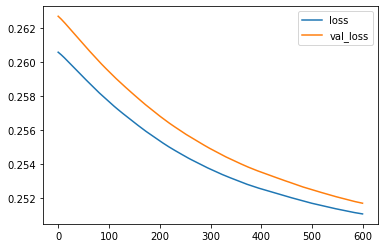

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
losses.plot()

In [40]:
losses.mean()

loss        0.254445
val_loss    0.255704
dtype: float64

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
